In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
R=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Placement_Data.csv")

In [ ]:
R.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


In [ ]:
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
R.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
R.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
R.shape

(215, 15)

In [ ]:
R.shape[1]

15

**What is the average Secondary Education percentage - 10th Grade**


In [ ]:
R["ssc_p"].mean()

67.30339534883721

In [ ]:
R["ssc_p"].max()

89.4

**How many toppers where there in 10th Grade?**


In [ ]:
R[R["ssc_p"]==R["ssc_p"].max()].shape[0]

1

**Is the student who got highest Secondary Eduaction percentage, placed or not?**


In [ ]:
R[R["ssc_p"]==R["ssc_p"].max()]["status"]

145    Placed
Name: status, dtype: object

**How many students are placed or unplaced?**


In [ ]:
R["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

**What is the most common degree of the placed students?**


In [ ]:
R[R["status"]=="Placed"]["degree_t"].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

**How many unique degrees are there in the dataset?**


In [ ]:
R["degree_t"].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

**Is there a correlation between 10th and 12th percentage**


In [ ]:
R[["ssc_p","hsc_p"]].corr()


,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


correlation matrix

In [ ]:
R["ssc_p"].corr(R["hsc_p"])


0.5114721015997723

In [ ]:
R.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [ ]:
R.corrwith(R["salary"])

sl_no       0.063764
ssc_p       0.035330
hsc_p       0.076819
degree_p   -0.019272
etest_p     0.178307
mba_p       0.175013
salary      1.000000
dtype: float64

Preporessing 
**Identify the column which can be removed?(only 1)**
**Remove the unnecessary column**


In [ ]:
R.drop('sl_no',axis = 1,inplace = True)


**Check number of null values in each column**


In [ ]:
R.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Fill the missing values with appropriate values and check number of null values in each column again**


In [ ]:
R.fillna(0,inplace = True)

Data Visualization

**Draw a scatter plot between 10th and 12th percentage**


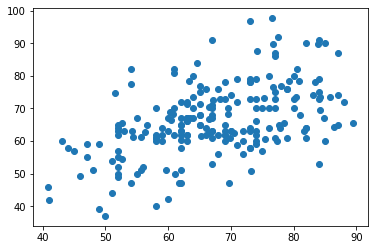

In [ ]:
plt.scatter('ssc_p', 'hsc_p',data=R)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'plot')

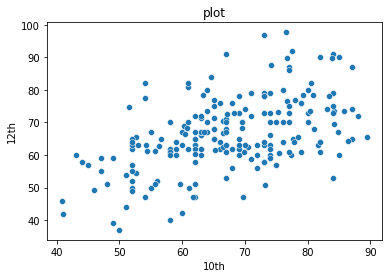

In [ ]:
sns.scatterplot('ssc_p', 'hsc_p',data=R)
plt.xlabel('10th')
plt.ylabel('12th')
plt.title("plot")


**Draw the scatter plot between 10th and 12th class percentage of students grouped based on placement data**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


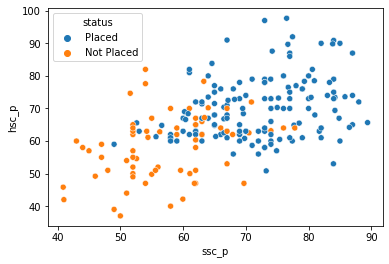

In [ ]:
sns.scatterplot('ssc_p', 'hsc_p',data=R,hue='status')

In [ ]:
Color={"Placed":'tab:red',"Not Placed":'tab:green'}
R['status'].map(Color)

0        tab:red
1        tab:red
2        tab:red
3      tab:green
4        tab:red
         ...    
210      tab:red
211      tab:red
212      tab:red
213      tab:red
214    tab:green
Name: status, Length: 215, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatter plot between 10th and 12th percentage')

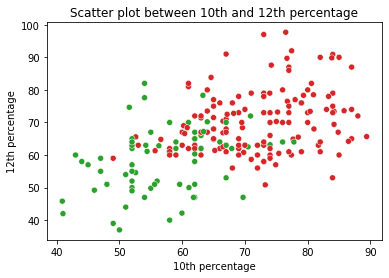

In [ ]:
sns.scatterplot(R['ssc_p'],R['hsc_p'],c=R['status'].map(Color))
plt.xlabel("10th percentage")
plt.ylabel("12th percentage")
plt.title("Scatter plot between 10th and 12th percentage")


**Draw the pairplots between all continuous columns**


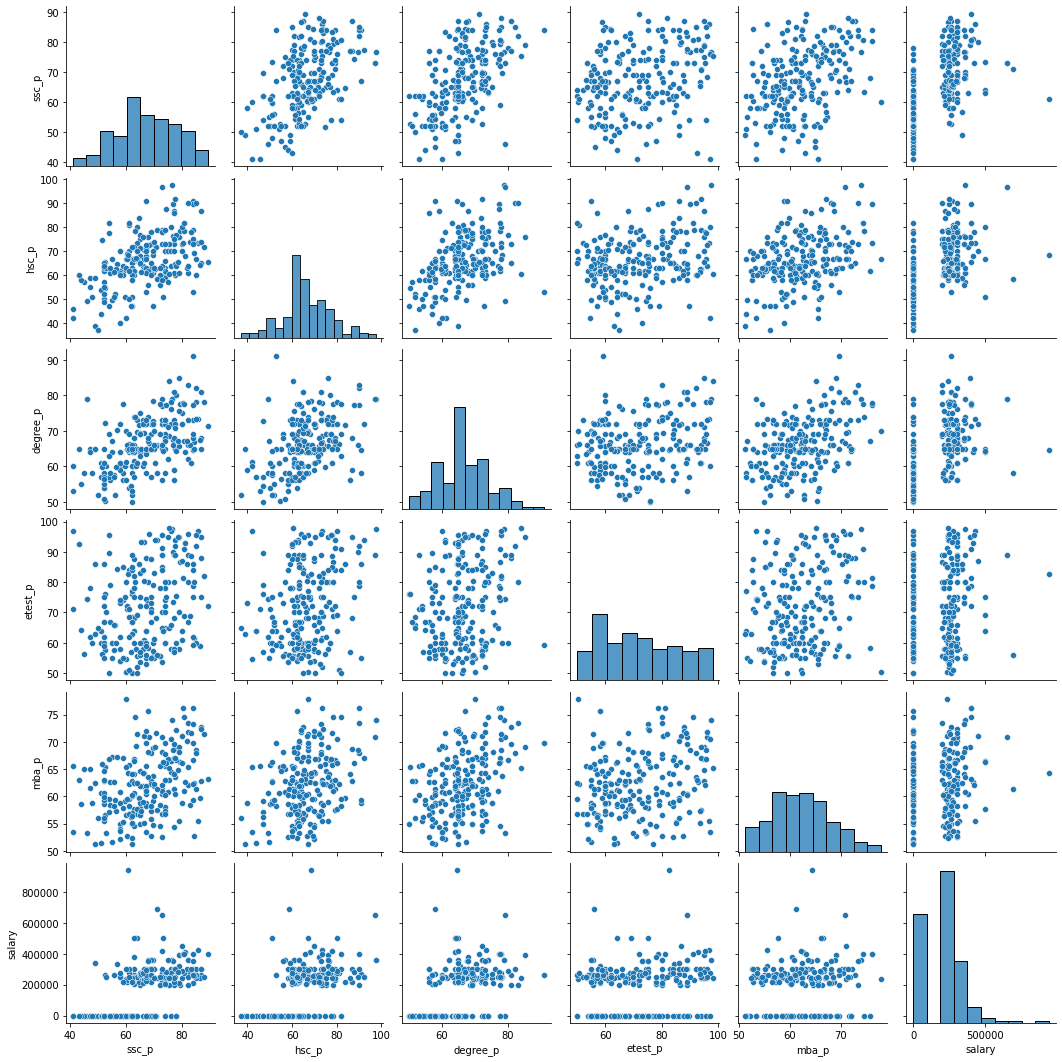

In [ ]:
sns.pairplot(R)

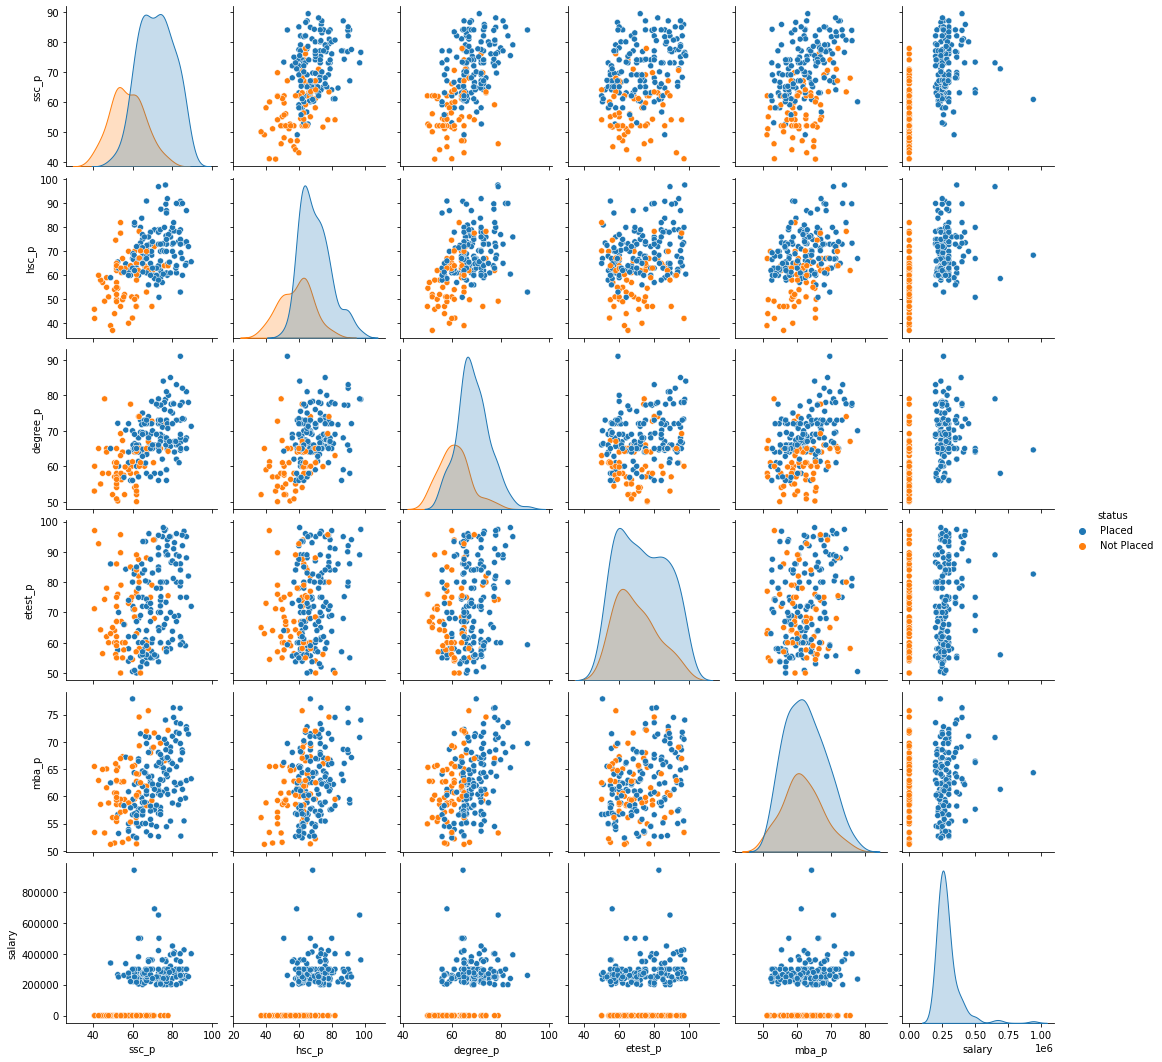

In [ ]:
sns.pairplot(R,hue='status')


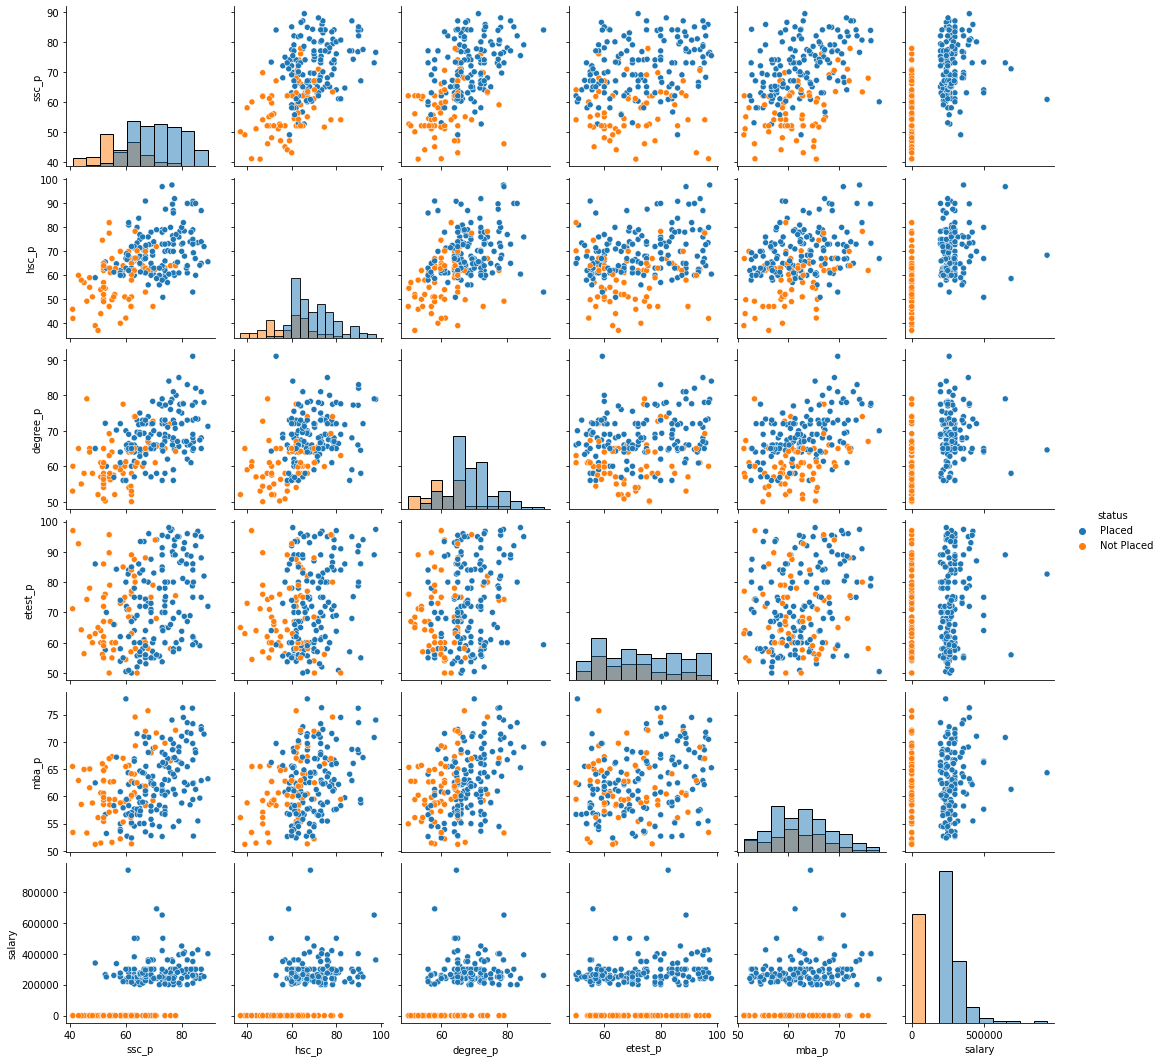

In [ ]:
sns.pairplot(R,hue='status',diag_kind="hist")

Boxplot for 10th percentage

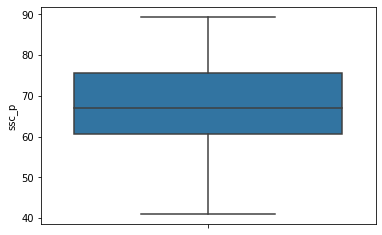

In [ ]:
sns.boxplot(y='ssc_p',data=R)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


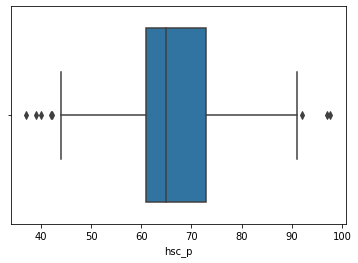

In [ ]:
sns.boxplot('hsc_p',data=R)

# Draw a boxplot for 12th percentage of the students for placed and unplaced students

In [ ]:
placed=R[R["status"]=="Placed"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


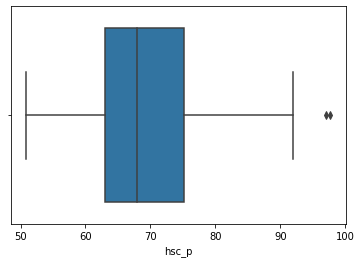

In [ ]:
sns.boxplot(placed['hsc_p'],data=R)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


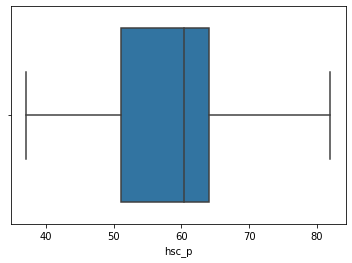

In [ ]:
not_placed=R[R["status"]=="Not Placed"]
sns.boxplot(not_placed['hsc_p'],data=R)

In [ ]:
R.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


# Draw lineplot for 10th, 12th, degree and MBA percentage

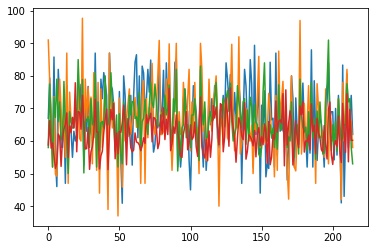

In [ ]:
plt.plot(R['ssc_p'])
plt.plot(R['hsc_p'])
plt.plot(R['degree_p'])
plt.plot(R['mba_p'])


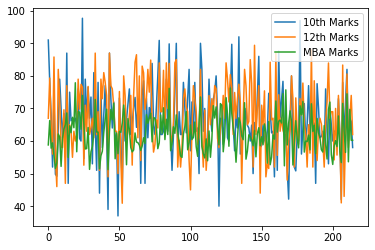

In [ ]:
plt.plot(R['hsc_p'],label='10th Marks')
plt.plot(R['ssc_p'],label='12th Marks')
plt.plot(R['mba_p'],label='MBA Marks')
plt.legend()
plt.show()


# Find correlation between continous columns

In [ ]:
R.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


# Draw heatmap of correlation

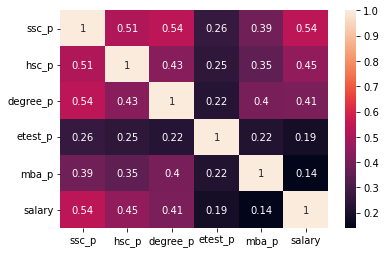

In [ ]:
sns.heatmap(R.corr(),annot=True)

# Draw histogram for salary of students

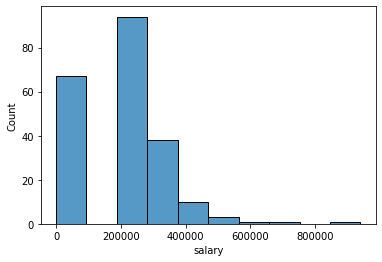

In [ ]:
sns.histplot(R["salary"])

# Draw the distribution of 10th Grade percentage

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


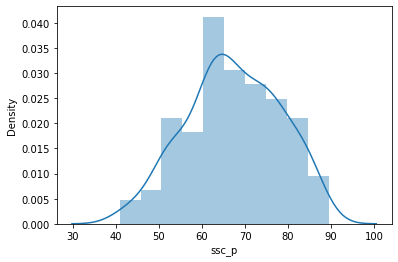

In [ ]:
sns.distplot(R["ssc_p"])

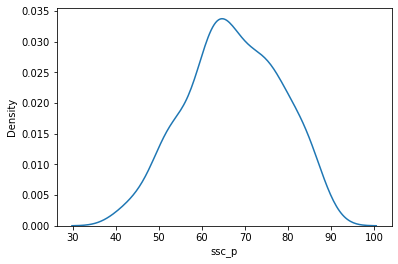

In [ ]:
sns.kdeplot(R["ssc_p"])

# Outlier Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


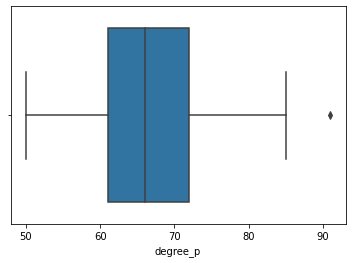

In [ ]:
sns.boxplot(R['degree_p'])

In [ ]:
percentile25=R['degree_p'].quantile(0.25)

In [ ]:
percentile75=R['degree_p'].quantile(0.75)

In [ ]:
IQR=percentile75-percentile25

In [ ]:
IQR

11.0

In [ ]:
upper_limit=percentile75+(1.5*IQR)

In [ ]:
lower_limit=percentile25-(1.5*IQR)

In [ ]:
R1=R[(R['degree_p']<upper_limit) & (R['degree_p']>lower_limit)]

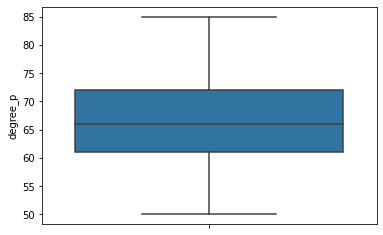

In [ ]:
sns.boxplot(y='degree_p',data=R1)

In [ ]:
R.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

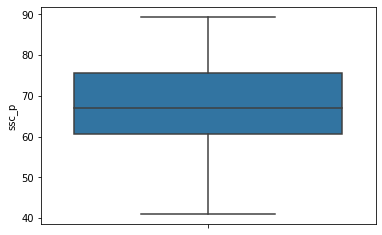

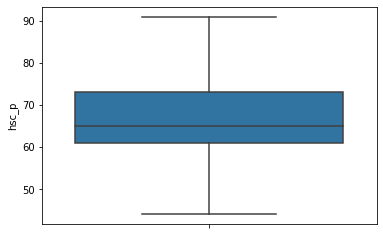

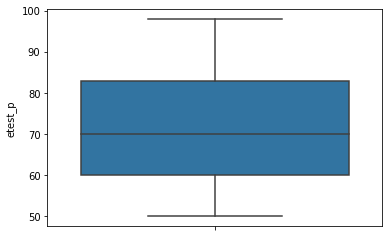

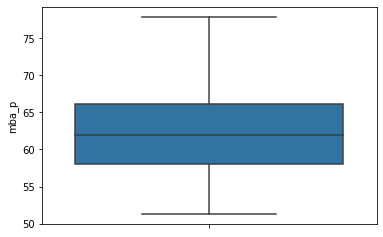

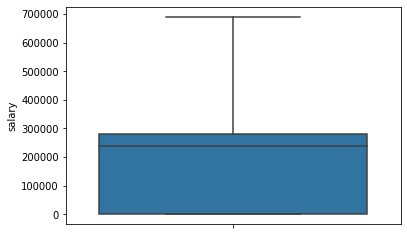

In [ ]:
col=[ 'ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
  percentile25=R[c].quantile(0.25)
  percentile75=R[c].quantile(0.75)
  IQR=percentile75-percentile25
  upper_limit=percentile75+(1.5*IQR)
  lower_limit=percentile25-(1.5*IQR)
  R=R[(R[c]<upper_limit) & (R[c]>lower_limit)]
  plt.figure()
  sns.boxplot(y=c,data=R)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
colu=['gender','hsc_b', 'hsc_s',
       'degree_t', 'workex', 'specialisation','status',"ssc_b"]

In [ ]:
for c in colu:
  R[c]=le.fit_transform(R[c])

In [ ]:
R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
Y=R.iloc[:,-1].values

In [ ]:
X=R.iloc[:,:-1].values

In [ ]:
Y.shape

(206,)

In [ ]:
X.shape

(206, 13)

# Split the dataset into traing and testing 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

# use standardization and perform Linear regression 

# Normalization -minmaxscaler / standard distibution 

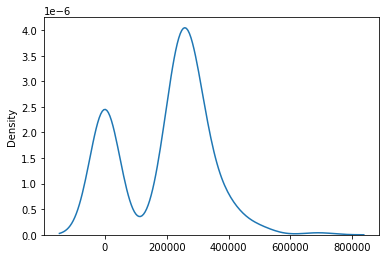

In [ ]:
sns.kdeplot(Y,data=R)

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()

In [ ]:
X_train=Sc.fit_transform(X_train)

In [ ]:
X_test=Sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [ ]:
LR.fit(X_train,Y_train)

LinearRegression()

In [ ]:
LR.coef_

array([ 16267.92557587,   7032.28458945,   5408.43282081,  -6972.95270291,
        -5555.53842718,   1828.70798683,  -7121.6992623 ,  12466.7539407 ,
        -3069.90594974,  -1105.3391293 ,  -4431.61260531,  16177.87878489,
       122022.61338903])

In [ ]:
LR.intercept_

210416.66666666666

In [ ]:
Y_pred=LR.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
r2=r2_score(Y_test,Y_pred)


In [ ]:
r2

0.8667358958781073

In [ ]:
print("mean_absolute_error",mean_absolute_error(Y_test,Y_pred))

mean_absolute_error 35467.0050920837


In [ ]:
print("mean_squared_error",mean_squared_error(Y_test,Y_pred))

mean_squared_error 2755600095.602405


In [ ]:
print("Root-mean_squared_error",np.sqrt(mean_squared_error(Y_test,Y_pred)))

Root-mean_squared_error 52493.81006940157


In [ ]:
Adjested_r2=1-((1-r2)*205)/(192)

In [ ]:
Adjested_r2

0.8577128054948542

In [ ]:
R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


extract x,y

In [ ]:
X11=R.iloc[:,:12]

In [ ]:
Y11=R.iloc[:,-2:-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X11,Y11,test_size=0.30,random_state=0)

use standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc1=StandardScaler()

In [ ]:
X_train=Sc1.fit_transform(X_train)

In [ ]:
X_test=Sc1.transform(X_test)

Logistic regrarion modal

In [ ]:
from sklearn.linear_model import LogisticRegression
LOG=LogisticRegression()

In [ ]:
LOG.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
Y_pred1=LOG.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_curve,roc_auc_score,confusion_matrix,precision_score,recall_score

In [ ]:
accuracy_score(Y_pred1,Y_test)

0.8225806451612904

In [ ]:
TN,FP,FN,TP=confusion_matrix(Y_pred1,Y_test).ravel()

In [ ]:
TN,FP,FN,TP

(15, 1, 10, 36)

In [ ]:
precision_score(Y_pred1,Y_test)

0.972972972972973

**Create the classification report and understand each term in it**


In [ ]:
print(classification_report(Y_pred1,Y_test))

              precision    recall  f1-score   support

           0       0.60      0.94      0.73        16
           1       0.97      0.78      0.87        46

    accuracy                           0.82        62
   macro avg       0.79      0.86      0.80        62
weighted avg       0.88      0.82      0.83        62



In [ ]:
R_zero=TN/(TN+FN)

In [ ]:
R_zero

0.6

In [ ]:
macro_avg=(0.60+0.94)/2
Weighted_avg=(0.60*(16/62))+(0.97*(46/62))

In [ ]:
macro_avg

0.77

In [ ]:
Weighted_avg

0.874516129032258

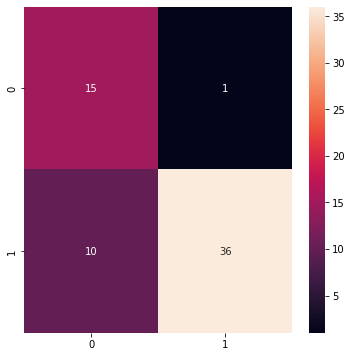

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(Y_pred1,Y_test),annot=True)

In [ ]:
roc_auc_score(Y_pred1,Y_test)

0.860054347826087

**Find out number of 0 classes in Y_test**


In [ ]:
Y_test.value_counts()

status
1         37
0         25
dtype: int64

In [ ]:
f1_score(Y_pred1,Y_test)

0.8674698795180723

In [ ]:
Y_pred2=(LOG.predict_proba(X_test)[:,1]>=0.7).astype(int)

In [ ]:
# for i in ['job','marital','education','housing','loan','poutcome']:
#     a = pd.DataFrame(one.fit_transform(bank[[i]]).toarray(),columns=one.get_feature_names([i]))
#     bank = bank.merge(a.iloc[:,:len(a.columns)-1],right_index=True,left_index=True)


In [ ]:
fpr,tpr,threshold=roc_curve(Y_test,LOG.predict_proba(X_test)[:,1])

In [ ]:
fpr

array([0., 1.])

In [ ]:
tpr

array([0., 1.])

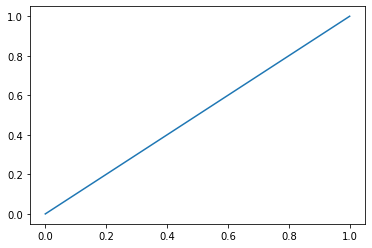

In [ ]:
plt.plot(fpr,tpr)

# Decision Tree

In [ ]:
R.head(4)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0


In [ ]:
R.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
X3=R[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']].values

In [ ]:
Y3=R['status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X3,Y3,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dc=DecisionTreeClassifier()

In [ ]:
Dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred3=Dc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_curve,roc_auc_score,confusion_matrix,precision_score,recall_score

In [ ]:
TN,FP,FN,TP=confusion_matrix(Y_test,Y_pred3).ravel()

In [ ]:
TN,FP,FN,TP

(12, 6, 5, 39)

In [ ]:
accuracy_score(Y_test,Y_pred3)

0.8225806451612904

In [ ]:
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.87      0.89      0.88        44

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.82      0.82      0.82        62



In [ ]:
Y_pred_train=Dc.predict(X_train)

In [ ]:
print(classification_report(Y_train,Y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       100

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [ ]:
from sklearn import tree 

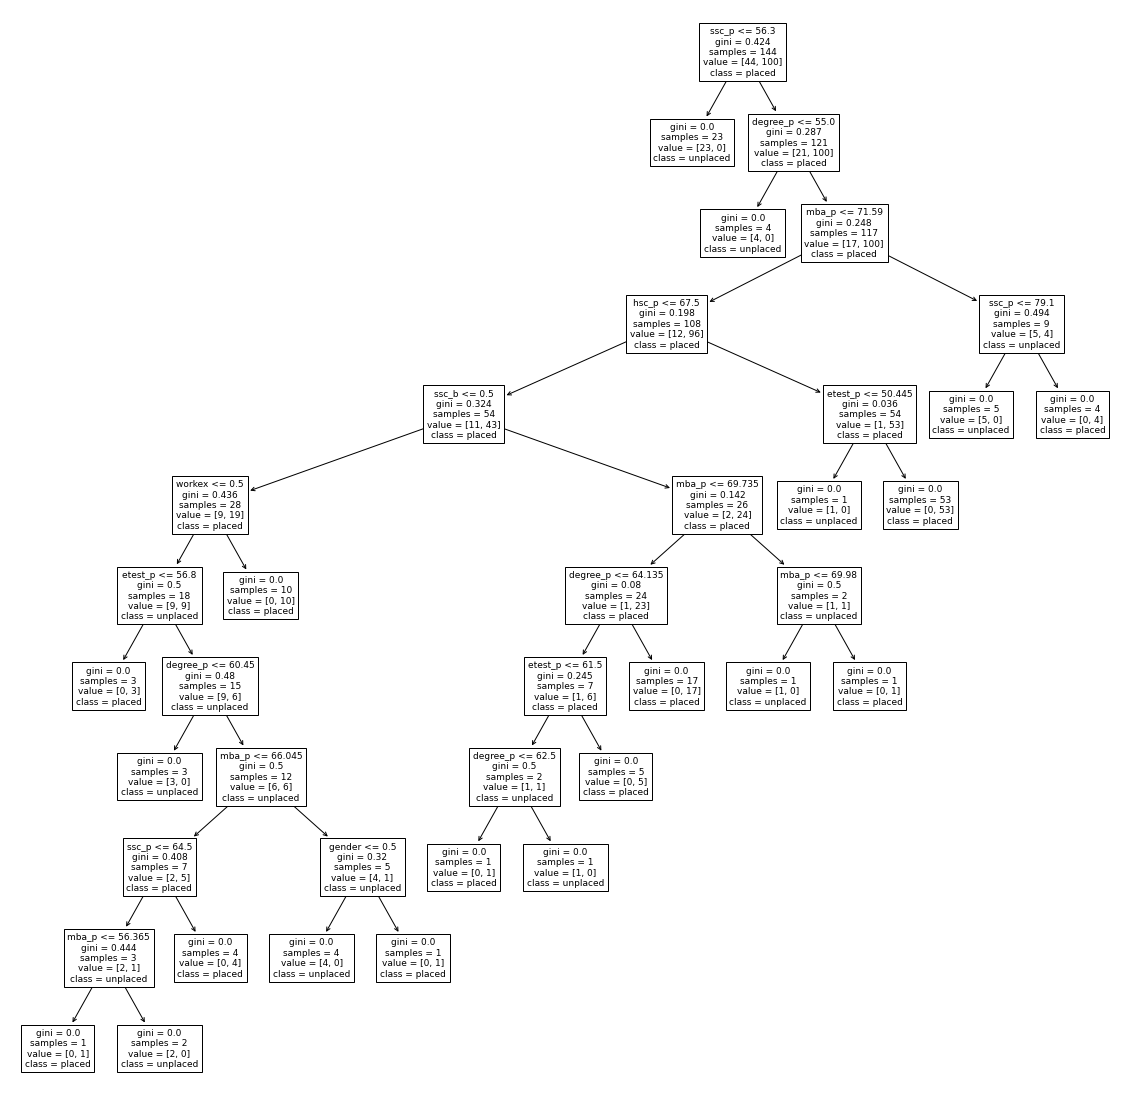

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(Dc,feature_names=R.columns[:-2],class_names=['unplaced',"placed"])
plt.show()

In [ ]:
R.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.8,1,270000.0


**Random** **forest**

In [ ]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,150]

In [ ]:
max_features=['sqrt','log2']

In [ ]:
max_depth=np.linspace(10,120,10,dtype=int)

In [ ]:
np.linspace(10,120,10)

array([ 10.        ,  22.22222222,  34.44444444,  46.66666667,
        58.88888889,  71.11111111,  83.33333333,  95.55555556,
       107.77777778, 120.        ])

In [ ]:
np.linspace(10,120,10,dtype=int)

array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120])

In [ ]:
[int(x) for x in np.linspace(10,120,10)]

[10, 22, 34, 46, 58, 71, 83, 95, 107, 120]

In [ ]:
criterion=["gini",'entropy']

In [ ]:
min_samples_split=[2,4,6,8,10,12,14,16,18,20]


In [ ]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'criterion':criterion,
             'min_samples_split':min_samples_split}


In [ ]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
rdsc = RandomizedSearchCV(estimator =RFC, param_distributions = random_grid, cv = 5, n_iter = 100 , n_jobs = 1)


In [ ]:
rdsc.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         150]})

In [ ]:
rdsc.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 107,
 'criterion': 'gini'}

In [ ]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [ ]:
rfbm=RandomForestClassifier(n_estimators=70,min_samples_split=6,max_features='log2',max_depth=46,criterion = 'gini')

In [ ]:
rfbm.fit(X_train,Y_train)

RandomForestClassifier(max_depth=46, max_features='log2', min_samples_split=6,
                       n_estimators=70)

In [ ]:
Y_pred5=rfbm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_curve,roc_auc_score,confusion_matrix,precision_score,recall_score

In [ ]:
accuracy_score(Y_test,Y_pred5)

0.8064516129032258

In [ ]:
print(classification_report(Y_test,Y_pred5))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.83      0.91      0.87        44

    accuracy                           0.81        62
   macro avg       0.77      0.73      0.75        62
weighted avg       0.80      0.81      0.80        62



In [ ]:
confusion_matrix(Y_test,Y_pred5)

array([[10,  8],
       [ 4, 40]])

In [ ]:
R.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(R)
data_scaled=pd.DataFrame(data_scaled)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Kmeans=KMeans(3)

In [ ]:
Kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [ ]:
Kmeans.predict(data_scaled)

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 2, 1, 0], dtype=int32)

In [ ]:
Kmeans.inertia_

2068.8036717395357

In [ ]:
SSE = []
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Number of inertia_')

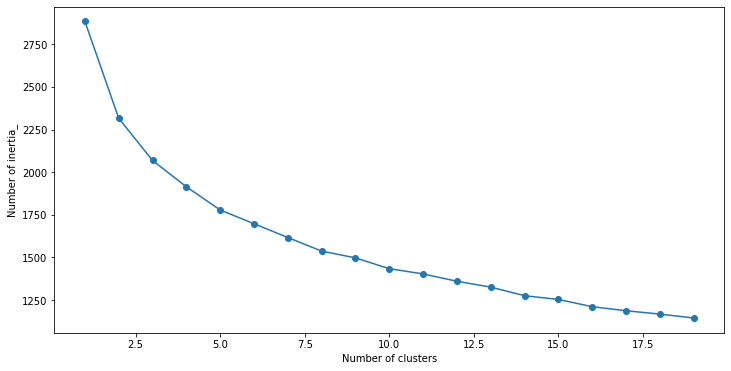

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Number of inertia_')

In [ ]:
R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


# PCA

In [ ]:
R_new=R.drop(columns=['status','salary'],axis=1)

In [ ]:
R_new.shape

(206, 12)

In [ ]:
W=R_new.drop(columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1)

In [ ]:
W

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49
211,58.00,60.00,72.00,74.0,53.62
212,67.00,67.00,73.00,59.0,69.72
213,74.00,66.00,58.00,70.0,60.23


In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [ ]:
X_trans=st.fit_transform(W)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=4)

In [ ]:
principal_components=pca.fit_transform(X_trans)

In [ ]:
principal_components

array([[-9.43956908e-02, -1.30675081e+00, -1.75111959e+00,
        -2.22317766e+00],
       [ 2.53064860e+00,  2.99707083e-01, -2.82366162e-01,
         2.24402157e-01],
       [-4.70013793e-01,  3.86312210e-01, -6.84203557e-01,
        -8.42451479e-02],
       [-2.57940056e+00,  4.85735799e-01,  5.58658273e-01,
        -3.70965774e-01],
       [ 1.80000041e+00,  1.37719989e+00, -1.77708136e+00,
         1.00020908e+00],
       [-2.53569553e+00, -6.39111213e-01, -3.68146679e-01,
         1.52502724e+00],
       [-1.62300929e+00,  4.39063298e-01,  9.99468251e-02,
         2.33884513e+00],
       [ 4.35534128e-01, -4.32625145e-01, -1.89172283e-01,
         4.45858109e-01],
       [ 1.63187199e+00,  9.66368060e-01, -9.33332672e-01,
        -1.20378236e-01],
       [-1.83287413e+00, -9.04608043e-01, -1.40929277e+00,
        -3.51520188e-01],
       [-1.50467738e+00, -2.73631605e-01,  2.89493893e-01,
        -3.33871243e-01],
       [ 8.15615051e-01, -1.32437445e+00,  1.32984822e-01,
      

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9100571938879993

In [ ]:
YY=pd.DataFrame(principal_components,columns=['PC1','PC2','PC3','PC4'])

In [ ]:
sum_R=R[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation',"status","salary"]]

In [ ]:
sum_R=sum_R.reset_index()

In [ ]:
YY=YY.reset_index()

In [ ]:
WW=pd.concat([YY,sum_R],axis=1)

In [ ]:
WW.reset_index()

,level_0,index,PC1,PC2,PC3,PC4,index,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary
0,0,0,-0.094396,-1.306751,-1.751120,-2.223178,0,1,1,1,1,2,0,1,1,270000.0
1,1,1,2.530649,0.299707,-0.282366,0.224402,1,1,0,1,2,2,1,0,1,200000.0
2,2,2,-0.470014,0.386312,-0.684204,-0.084245,2,1,0,0,0,0,0,0,1,250000.0
3,3,3,-2.579401,0.485736,0.558658,-0.370966,3,1,0,0,2,2,0,1,0,0.0
4,4,4,1.800000,1.377200,-1.777081,1.000209,4,1,0,0,1,0,0,0,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,201,201,3.482236,0.408582,0.680195,-0.468256,210,1,1,1,1,0,0,0,1,400000.0
202,202,202,-0.979520,0.330596,-0.694871,1.245880,211,1,1,1,2,2,0,0,1,275000.0
203,203,203,0.678186,-1.267008,1.119611,0.044747,212,1,1,1,1,0,1,0,1,295000.0
204,204,204,-0.472074,0.127999,-0.430634,-0.435024,213,0,1,1,1,0,0,1,1,204000.0


In [ ]:
Y5=WW.iloc[:,-1].values

In [ ]:
X5=WW.iloc[:,:-1].values

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X5,Y5,test_size=0.3,random_state=1)

In [ ]:
regg=LinearRegression()
regg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred7=regg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test,Y_pred7)

0.8931454890683076